<a href="https://colab.research.google.com/github/phuongwj/Neural-Networks/blob/main/Assignment_3_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks**



---



## **Question 1: Perceptron**

### **Q1.1: Implement the Perceptron learning algorithm using NumPy for binary classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Q1.1: Implement a simple Perceptron class for binary classification
class Perceptron:
  def __init__(self, input_dim, learning_rate=0.1):
    # initialize weights and bias

    self.learning_rate = learning_rate
    self.weights = np.random.rand(input_dim + 1) * 0.01

  def predict(self, X):
      # return binary prediction

      # Creates a column of 1s with same number of rows
      num_rows = X.shape[0]
      ones = np.ones((X.shape[0], 1))

      # Adding bias column
      X_with_bias = np.column_stack([X, ones])

      # Implementing the perceptron calculation (i.e. w1*x1 + w2*x2 + bias*1)
      weighted_sum = np.dot(X_with_bias, self.weights)

      # Replacing numbers greater than 0 with 1, otherwise replace with 0
      predictions = np.where(weighted_sum >= 0, 1, 0)

      return predictions

  def train(self, X, y, epochs=100):
      # implement perceptron update rule

      # Creates a column of 1s with the same number of rows
      num_rows = X.shape[0]
      ones = np.ones((X.shape[0], 1))

      # Adding bias column
      X_with_bias = np.column_stack([X, ones])

      # Repeat learning process 'epochs' times
      for ep in range(epochs):
        for i in range(len(X_with_bias)):

          # Get one point and its corresponding label
          x_i = X_with_bias[i]
          y_i = y[i]

          # Making prediction
          weighted_sum = np.dot(x_i, self.weights)
          prediction = 0
          if weighted_sum >= 0:
            prediction = 1

          # Checking for wrongness
          error = y_i - prediction

          if error != 0:
            self.weights += self.learning_rate * error * x_i

# Function to plot the points
def plot_dataset(X, y):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Points')
    plt.legend()
    plt.show()

# Function to plot the points and to draw the decision boundary
def plot_dataset_and_visualize_decision_boundary(X, y, perceptron):

    # Plotting data points (from starter code)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

    # Retrieving w1, w2, and bias from the perceptron weights list
    w1, w2, bias = perceptron.weights

    # Loop through first column of every row to find the minimum and maximum
    x1_min = X[:, 0].min() - 0.1
    x1_max = X[:, 0].max() + 0.1

    # Draw the line for x1
    x1_line = np.linspace(x1_min, x1_max)

    # (w1 * x1) + (w2 * x2) + bias = ...
    # (w1 * x1) + bias = - (w2 * x2)
    # ( (w1 * x1) + bias ) / -w2 = x2

    # Calculates x2_line based on what we have
    x2_line = ( (w1*x1_line) + bias ) / -w2

    plt.plot(x1_line, x2_line, color='green', linewidth=2, label="Decision Boundary")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()



---



### **Q1.2: Train your model on a small synthetic 2D dataset. Visualize the decision boundary at the end of training**

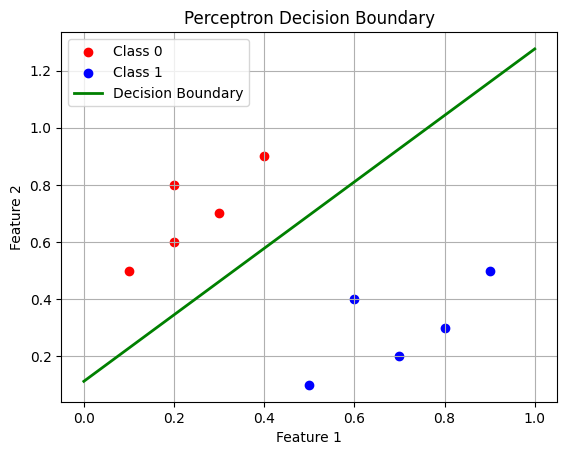

In [ ]:
# Q1.2: A synthetic dataset for binary classification

# Features (x1, x2)
X = np.array([
    [0.2, 0.8],
    [0.4, 0.9],
    [0.1, 0.5],
    [0.3, 0.7],
    [0.6, 0.4],
    [0.7, 0.2],
    [0.9, 0.5],
    [0.8, 0.3],
    [0.5, 0.1],
    [0.2, 0.6]
])

# Labels
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

# Initializing a new Perceptron from the Perceptron class, with a 2D dataset
perceptron = Perceptron(input_dim=2)

# Train the perceptron
perceptron.train(X, y, epochs=50)

# Make predictions
predictions = perceptron.predict(X)

plot_dataset_and_visualize_decision_boundary(X, y, perceptron)



---



### **Q1.3: Modify the dataset so that the Perceptron does not converge. Explain why convergence fails in this case.**

**Answer:** A Perceptron converges when classes can be separable using a straight line (i.e. we can have a decision boundary separating the classes). The reason to why convergence fails in this case is because the data points in 2 different classes form a XOR shape, which makes them not be linearly separable.

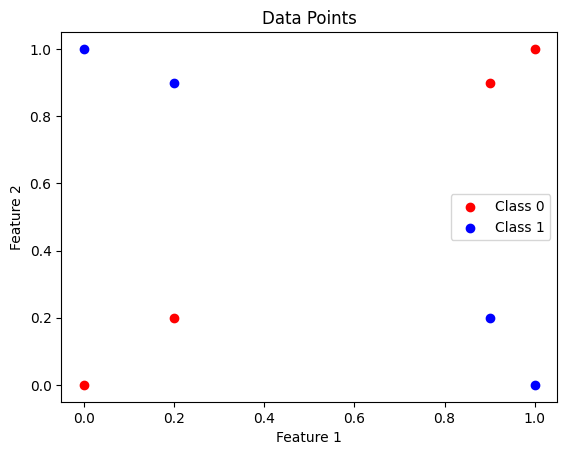

In [ ]:
# Q1.3: modified dataset
X1 = np.array([
    [0.0, 0.0],  # class 0
    [0.0, 1.0],  # class 1
    [1.0, 0.0],  # class 1
    [1.0, 1.0],  # class 0
    [0.2, 0.2],  # class 0
    [0.2, 0.9],  # class 1
    [0.9, 0.2],  # class 1
    [0.9, 0.9],  # class 0
])

# Labels (XOR pattern)
y1 = np.array([0, 1, 1, 0, 0, 1, 1, 0])


plot_dataset(X1, y1)



---



## **Question 2: Multi-Layer Perceptron**

### **Q2.1: Train a multi-layer perceptron with one hidden layer on the non-linearly separable problem from Question 1.3. Plot the decision regions.**

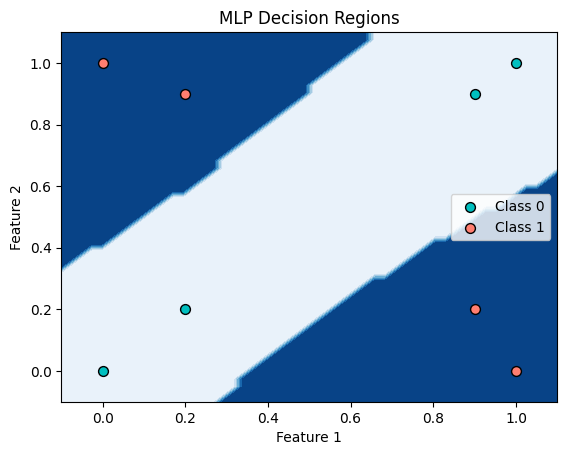

In [ ]:
from sklearn.neural_network import MLPClassifier

# Q2.1
X1 = np.array([
    [0.0, 0.0],  # class 0
    [0.0, 1.0],  # class 1
    [1.0, 0.0],  # class 1
    [1.0, 1.0],  # class 0
    [0.2, 0.2],  # class 0
    [0.2, 0.9],  # class 1
    [0.9, 0.2],  # class 1
    [0.9, 0.9],  # class 0
])

# Labels (XOR pattern)
y1 = np.array([0, 1, 1, 0, 0, 1, 1, 0])

# Function to plot decsion regions
def plot_decision_regions_mlp(mlp, X, y):

  # Loop through first column of every row that are classified as 0 to find the minimum and maximum
  x1_min = X[:, 0].min() - 0.1
  x1_max = X[:, 0].max() + 0.1

  # Loop through second column of every row that are classified as 1 to find the minimum and maximum
  x2_min = X[:, 1].min() - 0.1
  x2_max = X[:, 1].max() + 0.1

  # Creating a grid covering the plot area
  x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

  # Predict for all grind points and reshape
  predictions = mlp.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

  # Plot colored regions
  plt.contourf(x1, x2, predictions, cmap='Blues')

  # Plot data points
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='c', edgecolors='black', s=50, label='Class 0')
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='#ff7e70', edgecolors='black', s=50, label='Class 1')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('MLP Decision Regions')
  plt.legend()
  plt.show()

# Initializing the MLPClassifier class from sklearn
mlp = MLPClassifier(
    hidden_layer_sizes=(3),
    solver='lbfgs',
    activation='logistic'
)

# Trains the multi-layer perceptron
mlp.fit(X1, y1)

# Plotting decision regions
plot_decision_regions_mlp(mlp, X1, y1)



---



### **Q2.2: Explain your design choices for the hidden layer size and the activation function used. Your choices must be reasonably justified.**

**Hidden Layer Size**:

Since we only want 1 hidden layer, there's only 1 parameter in. To determine the number of units (neurons) for the hidden layer, I look at the input and output layers. In this case, the input layer has 2 features, and the ouput layer has 2 classes, but we're trying to determine only one of them, so that means 1 output. This led me to choosing the hidden layer size to be 2. However, after repeating the training process multiple times, I noticed that it doesn't give a very accurate visualization. So I moved it up to 3, even though there are still some iterations that are not accurate, I decided to go with 3 because the the average of accurate iterations looks good.

**Activation Function:**

I went with logistic out of all the other options (ReLU, Sigmoid, or Tanh) because the function's output is always between 0 or 1, and it fits with our problem where we always want to output either 0 or 1.



---



### **Q2.3: Explain what an epoch is in machine learning.**

Epoch refers to a one forward pass and one backward pass of all the training examples, where the data samples get passed through the model for the purpose of training.



---



## **Question 3: Making the Problem More Interesting**

### **Q3.1: Your starter code includes the synthetic dataset Two Moons. Adapt your multi-layer perceptron to work with this dataset. You may need to modify your architecture (e.g.,use 1–2 hidden layers). Plot the decision boundary.**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

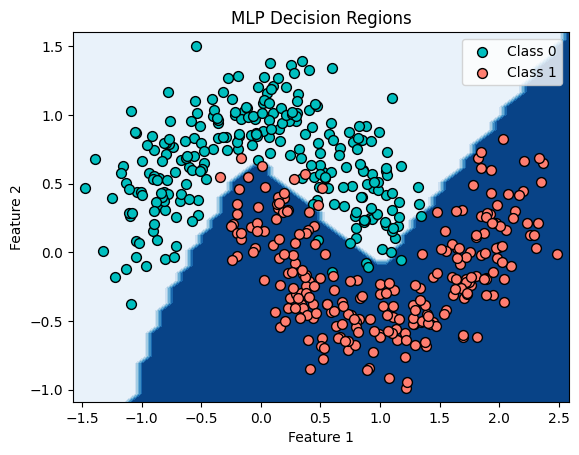

In [ ]:
# Q3.1
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Importing the dataset Two Moons (from starter code)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Initializing the MLPClassifier class from sklearn
mlp = MLPClassifier(
    hidden_layer_sizes=(10),
    solver='adam',
    activation='relu',
    warm_start=True,
    max_iter=1
)

train_losses = []
train_accuracy = []
n_epochs = 1000

# Going over epochs one by one
for epoch in range(n_epochs):
  # Trains the multi-layer perceptron
  mlp.fit(X, y)

  # Gets the training loss and accuracy over each epoch
  loss = mlp.loss_
  accuracy = mlp.score(X, y)

  # Stores training loss and accuracy in two arrays
  train_losses.append(loss)
  train_accuracy.append(accuracy)

# Plotting decision regions
plot_decision_regions_mlp(mlp, X, y)

### **Q3.2: Plot the training loss and accuracy over epochs.**

Text(0.5, 1.0, 'Training Accuracy over Epoch')

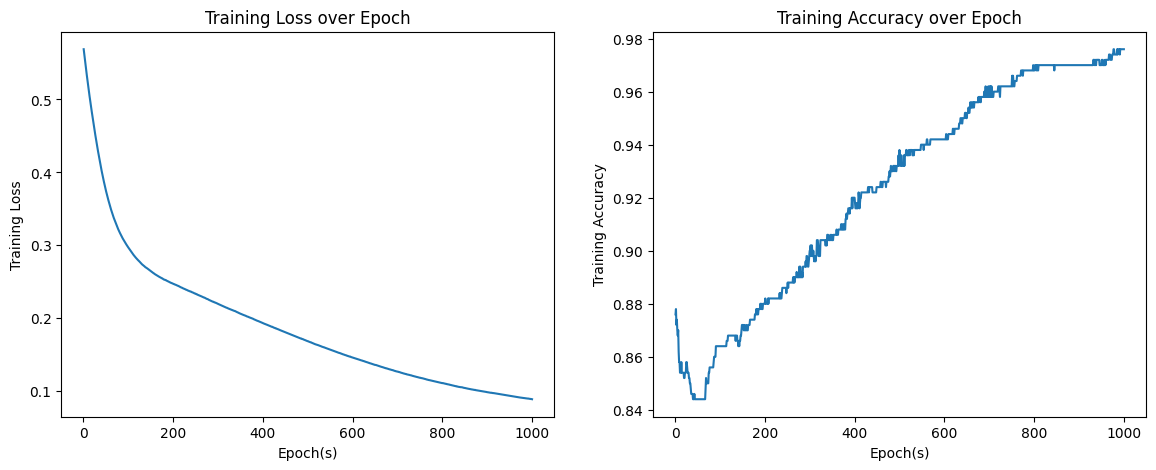

In [ ]:
# Q3.2

# Creating a figure and a subplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
length = range(1, n_epochs+1)

ax[0].plot(length, train_losses)
ax[0].set_xlabel('Epoch(s)')
ax[0].set_ylabel('Training Loss')
ax[0].set_title('Training Loss over Epoch')

ax[1].plot(length, train_accuracy)
ax[1].set_xlabel('Epoch(s)')
ax[1].set_ylabel('Training Accuracy')
ax[1].set_title('Training Accuracy over Epoch')

### **Q3.3: (A/A+) Try different MLP architectures by varying the number of hidden layers (1 or 2) and the number of units in each layer. Use your own judgment—or consult an AI tool—to choose appropriate values.**

### **1. Plot and compare training accuracy and training time for at least 4 different architectures.**

#### **MLP Architecture 1:**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

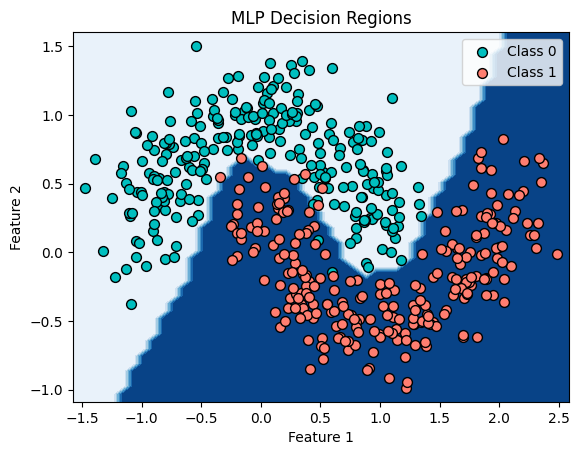

In [ ]:
# Architecture 1
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Importing the dataset Two Moons (from starter code)
X1, y1 = make_moons(n_samples=500, noise=0.2, random_state=42)

# Initializing the MLPClassifier class from sklearn
mlp1 = MLPClassifier(
    hidden_layer_sizes=(40),
    solver='adam',
    activation='relu',
    warm_start=True,
    max_iter=1
)

train_losses1 = []
train_accuracy1 = []
n_epochs1 = 1000

# Going over epochs one by one
for epoch in range(n_epochs1):
  # Trains the multi-layer perceptron
  mlp1.fit(X1, y1)

  # Gets the training loss and accuracy over each epoch
  loss1 = mlp1.loss_
  accuracy1 = mlp1.score(X1, y1)

  # Stores training loss and accuracy in two arrays
  train_losses1.append(loss1)
  train_accuracy1.append(accuracy1)

# Plotting decision regions
plot_decision_regions_mlp(mlp1, X1, y1)

#### **Training Accuracy and Training Loss for MLP Architecture 1**

Text(0.5, 1.0, 'Training Accuracy over Epoch')

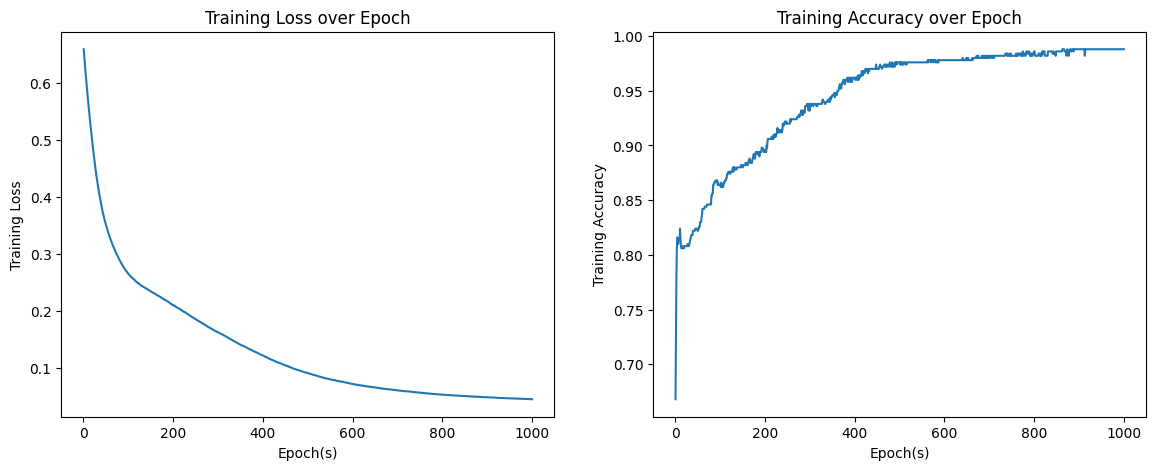

In [ ]:
# Creating a figure and a subplot
fig1, ax1 = plt.subplots(1, 2, figsize=(14, 5))
length1 = range(1, n_epochs1+1)

ax1[0].plot(length1, train_losses1)
ax1[0].set_xlabel('Epoch(s)')
ax1[0].set_ylabel('Training Loss')
ax1[0].set_title('Training Loss over Epoch')

ax1[1].plot(length1, train_accuracy1)
ax1[1].set_xlabel('Epoch(s)')
ax1[1].set_ylabel('Training Accuracy')
ax1[1].set_title('Training Accuracy over Epoch')



---



#### **MLP Architecture 2:**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

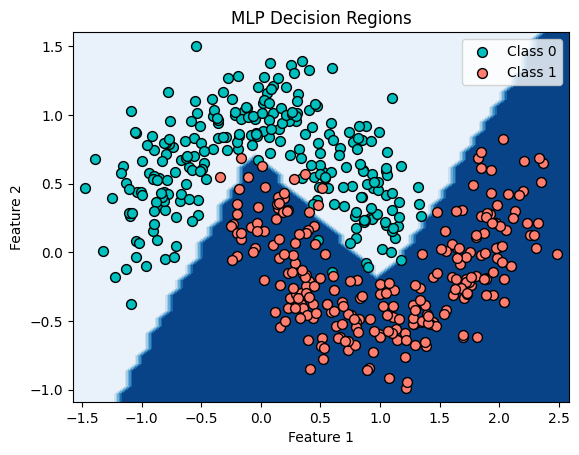

In [ ]:
# Architecture 2
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Importing the dataset Two Moons (from starter code)
X2, y2 = make_moons(n_samples=500, noise=0.2, random_state=42)

# Initializing the MLPClassifier class from sklearn
mlp2 = MLPClassifier(
    hidden_layer_sizes=(5 ,10),
    solver='adam',
    activation='relu',
    warm_start=True,
    max_iter=1
)

train_losses2 = []
train_accuracy2 = []
n_epochs2 = 1000

# Going over epochs one by one
for epoch in range(n_epochs2):
  # Trains the multi-layer perceptron
  mlp2.fit(X2, y2)

  # Gets the training loss and accuracy over each epoch
  loss2 = mlp2.loss_
  accuracy2 = mlp2.score(X2, y2)

  # Stores training loss and accuracy in two arrays
  train_losses2.append(loss2)
  train_accuracy2.append(accuracy2)

# Plotting decision regions
plot_decision_regions_mlp(mlp2, X2, y2)

#### **Training Accuracy and Training Loss for MLP Architecture 2**

Text(0.5, 1.0, 'Training Accuracy over Epoch')

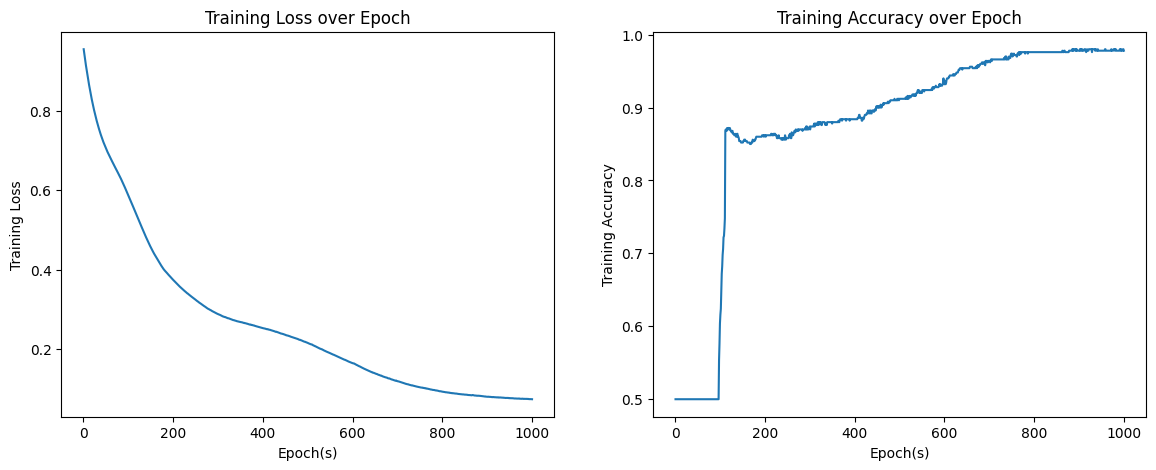

In [ ]:
# Creating a figure and a subplot
fig2, ax2 = plt.subplots(1, 2, figsize=(14, 5))
length2 = range(1, n_epochs2+1)

ax2[0].plot(length2, train_losses2)
ax2[0].set_xlabel('Epoch(s)')
ax2[0].set_ylabel('Training Loss')
ax2[0].set_title('Training Loss over Epoch')

ax2[1].plot(length2, train_accuracy2)
ax2[1].set_xlabel('Epoch(s)')
ax2[1].set_ylabel('Training Accuracy')
ax2[1].set_title('Training Accuracy over Epoch')



---



#### **MLP Architecture 3:**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

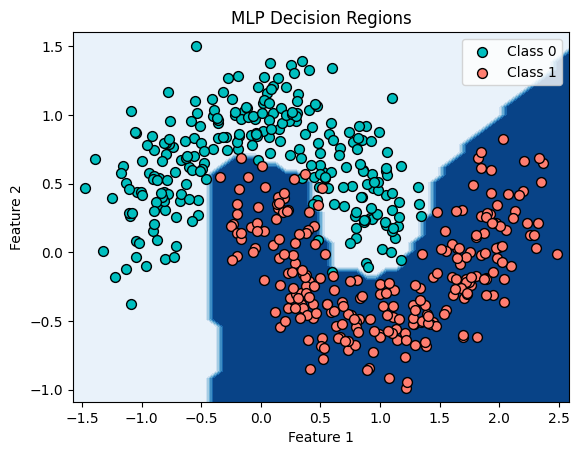

In [ ]:
# Architecture 3
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Importing the dataset Two Moons (from starter code)
X3, y3 = make_moons(n_samples=500, noise=0.2, random_state=42)

# Initializing the MLPClassifier class from sklearn
mlp3 = MLPClassifier(
    hidden_layer_sizes=(25 ,15),
    solver='adam',
    activation='relu',
    warm_start=True,
    max_iter=1
)

train_losses3 = []
train_accuracy3 = []
n_epochs3 = 1000

# Going over epochs one by one
for epoch in range(n_epochs3):
  # Trains the multi-layer perceptron
  mlp3.fit(X3, y3)

  # Gets the training loss and accuracy over each epoch
  loss3 = mlp3.loss_
  accuracy3 = mlp3.score(X3, y3)

  # Stores training loss and accuracy in two arrays
  train_losses3.append(loss3)
  train_accuracy3.append(accuracy3)

# Plotting decision regions
plot_decision_regions_mlp(mlp3, X3, y3)

#### **Training Accuracy and Training Loss for MLP Architecture 3**

Text(0.5, 1.0, 'Training Accuracy over Epoch')

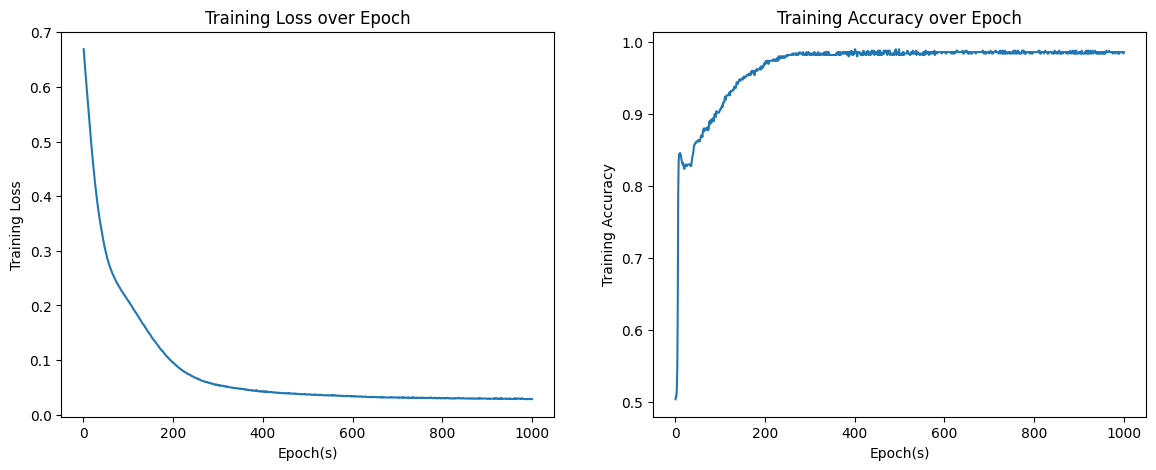

In [ ]:
# Creating a figure and a subplot
fig3, ax3 = plt.subplots(1, 2, figsize=(14, 5))
length3 = range(1, n_epochs3+1)

ax3[0].plot(length3, train_losses3)
ax3[0].set_xlabel('Epoch(s)')
ax3[0].set_ylabel('Training Loss')
ax3[0].set_title('Training Loss over Epoch')

ax3[1].plot(length3, train_accuracy3)
ax3[1].set_xlabel('Epoch(s)')
ax3[1].set_ylabel('Training Accuracy')
ax3[1].set_title('Training Accuracy over Epoch')



---



#### **MLP Architecture 4:**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

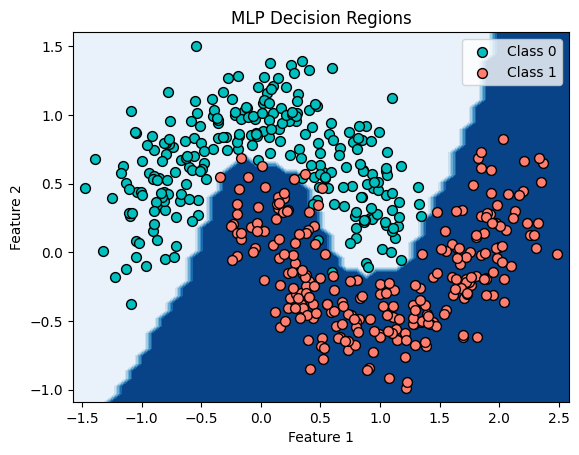

In [ ]:
# Architecture 4
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Importing the dataset Two Moons (from starter code)
X4, y4 = make_moons(n_samples=500, noise=0.2, random_state=42)

# Initializing the MLPClassifier class from sklearn
mlp4 = MLPClassifier(
    hidden_layer_sizes=(100),
    solver='adam',
    activation='relu',
    warm_start=True,
    max_iter=1
)

train_losses4 = []
train_accuracy4 = []
n_epochs4 = 1000

# Going over epochs one by one
for epoch in range(n_epochs4):
  # Trains the multi-layer perceptron
  mlp4.fit(X4, y4)

  # Gets the training loss and accuracy over each epoch
  loss4 = mlp4.loss_
  accuracy4 = mlp4.score(X4, y4)

  # Stores training loss and accuracy in two arrays
  train_losses4.append(loss4)
  train_accuracy4.append(accuracy4)

# Plotting decision regions
plot_decision_regions_mlp(mlp4, X4, y4)

#### **Training Accuracy and Training Loss for MLP Architecture 4**

Text(0.5, 1.0, 'Training Accuracy over Epoch')

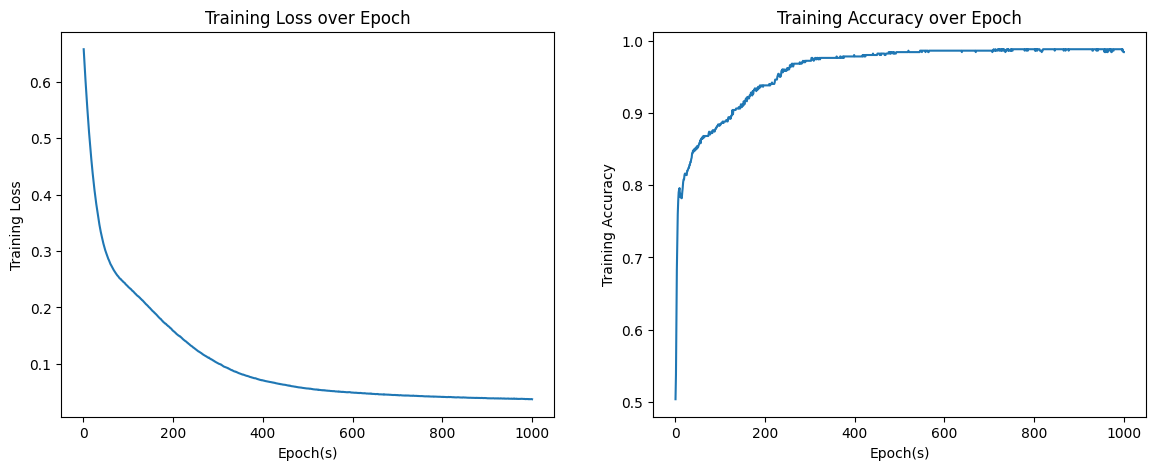

In [ ]:
# Creating a figure and a subplot
fig4, ax4 = plt.subplots(1, 2, figsize=(14, 5))
length4 = range(1, n_epochs4+1)

ax4[0].plot(length4, train_losses4)
ax4[0].set_xlabel('Epoch(s)')
ax4[0].set_ylabel('Training Loss')
ax4[0].set_title('Training Loss over Epoch')

ax4[1].plot(length4, train_accuracy4)
ax4[1].set_xlabel('Epoch(s)')
ax4[1].set_ylabel('Training Accuracy')
ax4[1].set_title('Training Accuracy over Epoch')



---



### **2. Detect and explain overfitting using training vs. test performance over time. Tip: your starter code includes guidance on how to split the data into training and test sets.**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

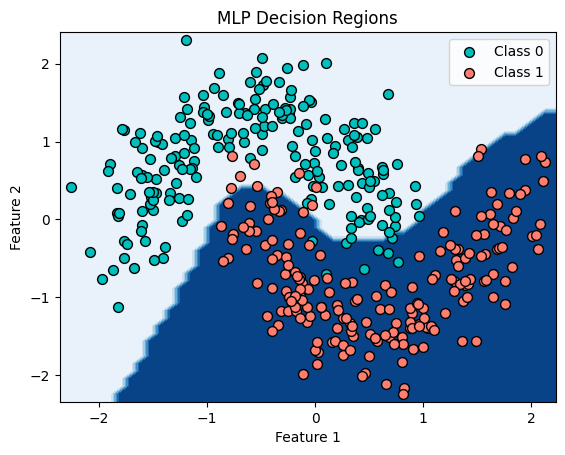

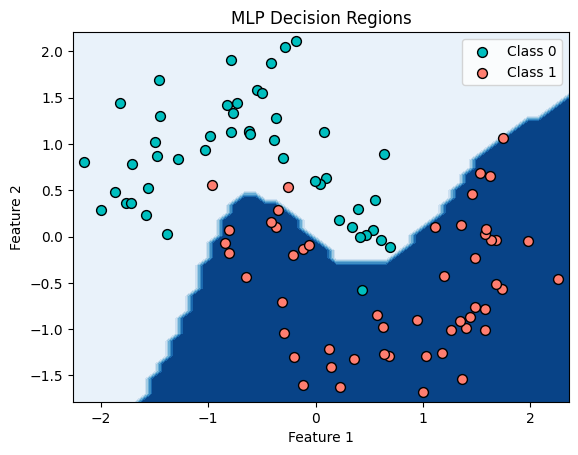

In [ ]:
# Importing the dataset Two Moons (from starter code)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the MLPClassifier class from sklearn for training set
mlp = MLPClassifier(
    hidden_layer_sizes=(25, 15),
    solver='adam',
    activation='relu',
    warm_start=True,
    max_iter=1
)

train_loss = []
train_accuracy = []
test_accuracy = []

n_epochs = 200

# Going over epochs one by one
for epoch in range(n_epochs):

  # Trains the multi-layer perceptron on training set
  mlp.fit(X_train, y_train)

  # Gets the training loss and accuracy over each epoch
  train_loss_epoch = mlp.loss_
  train_accuracy_epoch = mlp.score(X_train, y_train)

  # Stores training loss and accuracy in two arrays
  train_loss.append(train_loss_epoch)
  train_accuracy.append(train_accuracy_epoch)

  # Gets the testing accuracy over each epoch
  test_accuracy_epoch = mlp.score(X_test, y_test)

  # Stores testing accuracy in array
  test_accuracy.append(test_accuracy_epoch)

# Plotting decision regions for training set
plot_decision_regions_mlp(mlp, X_train, y_train)

# Plotting decision regions for testing set
plot_decision_regions_mlp(mlp, X_test, y_test)



---



#### **Training Set Accuracy vs Testing Set Accuracy**

Text(0.5, 1.0, 'Training vs Test Accuracy over Epoch')

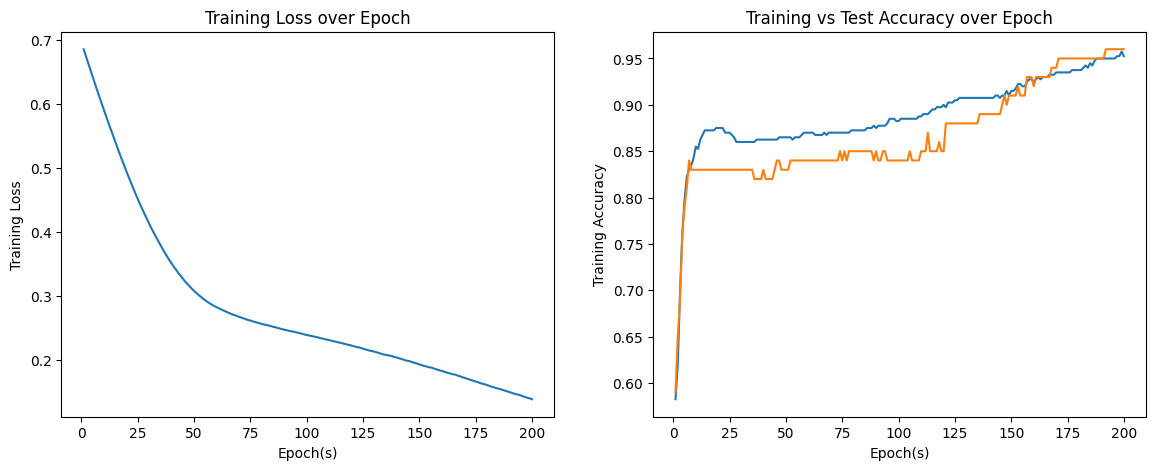

In [ ]:
# Creating a figure and a subplot
fig, (ax_loss, ax_accuracy) = plt.subplots(1, 2, figsize=(14, 5))
length_train = range(1, n_epochs+1)

# Graph on the left
ax_loss.plot(length_train, train_loss)
ax_loss.set_xlabel('Epoch(s)')
ax_loss.set_ylabel('Training Loss')
ax_loss.set_title('Training Loss over Epoch')

# Graph on the right
ax_accuracy.plot(length_train, train_accuracy) # blue line (training)
ax_accuracy.plot(length_train, test_accuracy) # orange line (testing)
ax_accuracy.set_xlabel('Epoch(s)')
ax_accuracy.set_ylabel('Training Accuracy')
ax_accuracy.set_title('Training vs Test Accuracy over Epoch')



---

